In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data

In [4]:
!pip install pandas_datareader

In [5]:
import pandas as pd
company="MSFT"
start='2022-05-15'
end='2022-10-15'

stocks=data.DataReader(name=company, data_source='yahoo', start=start, end=end)
pd.PeriodIndex(stocks.index, freq='D')

PeriodIndex(['2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
             '2022-05-20', '2022-05-23', '2022-05-24', '2022-05-25',
             '2022-05-26', '2022-05-27',
             ...
             '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06',
             '2022-10-07', '2022-10-10', '2022-10-11', '2022-10-12',
             '2022-10-13', '2022-10-14'],
            dtype='period[D]', name='Date', length=106, freq='D')

In [6]:
stocks.truncate(before='22-05-15', after='2022-10-15' )
stocks.reset_index(inplace = True)
stocks.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2022-05-16,265.820007,255.779999,259.959991,261.500000,32550900.0,260.339752
1,2022-05-17,268.329987,262.459991,266.109985,266.820007,28828800.0,265.636169
2,2022-05-18,263.600006,252.770004,263.000000,254.080002,31356000.0,253.541840
3,2022-05-19,257.670013,251.880005,253.899994,253.139999,32692300.0,252.603821
4,2022-05-20,258.540009,246.440002,257.239990,252.559998,39199300.0,252.025055


In [7]:
len(stocks.Date)

106

In [8]:
import matplotlib.pyplot as plt

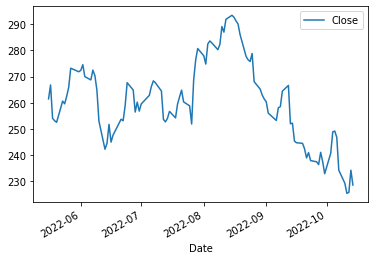

In [9]:
stocks_Close = stocks[['Date', 'Close']]
stocks_Close.plot(x='Date', y='Close')
plt.show()

<AxesSubplot:>

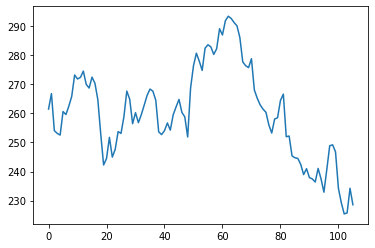

In [10]:
df = stocks_Close[['Date', 'Close']]
df.rename(columns = {'Close':'value'}, inplace=True)
df.value.plot()

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

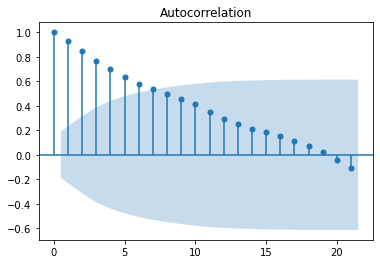

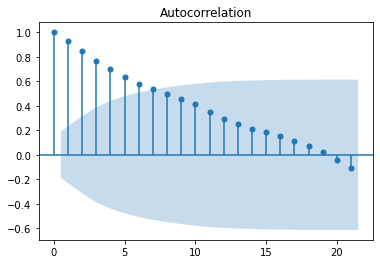

In [12]:
plot_acf(df.value)

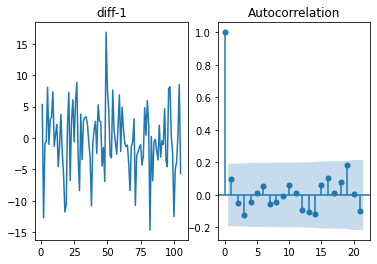

In [13]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-1')
ax1.plot(df.value.diff())
ax2 = f.add_subplot(122)
plot_acf(df.value.diff().dropna(), ax=ax2)
plt.show()

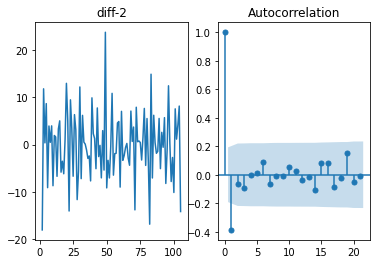

In [14]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-2')
ax1.plot(df.value.diff().diff())
ax2 = f.add_subplot(122)
plot_acf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.value.dropna())
print('p-value', result[1])
result = adfuller(df.value.diff().dropna())
print('p-value', result[1])
result = adfuller(df.value.diff().diff().dropna())
print('p-value', result[1])

p-value 0.5929881916321674
p-value 3.111957243902991e-15
p-value 1.0722611263188041e-12


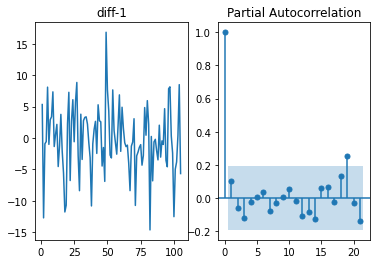

In [16]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-1')
ax1.plot(df.value.diff())
ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().dropna(), ax=ax2)
plt.show()

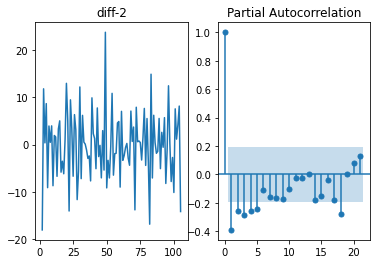

In [17]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-2')
ax1.plot(df.value.diff().diff())
ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()